# Regression

Regression analysis consists of 4 steps:<br>
    1. Fitted line plot<br>
    2. Regression<br>
    3. Residuals<br>
    4. Prediction Interval (optional)

In [7]:
data<-read.csv("Tea bags-Table 1.csv",
               header = TRUE,
               sep = ",",
               stringsAsFactors = FALSE,
               skip = 7) [ ,1:3]

In [9]:
linearMod <- lm(data$Bags ~ data$Stops,data = data)
summary(linearMod)


Call:
lm(formula = data$Bags ~ data$Stops, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02692 -0.91538  0.02885  1.08462  2.19615 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.3058     0.9307   6.775 6.55e-07 ***
data$Stops    1.9442     0.1426  13.635 1.66e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.454 on 23 degrees of freedom
Multiple R-squared:  0.8899,	Adjusted R-squared:  0.8851 
F-statistic: 185.9 on 1 and 23 DF,  p-value: 1.66e-12


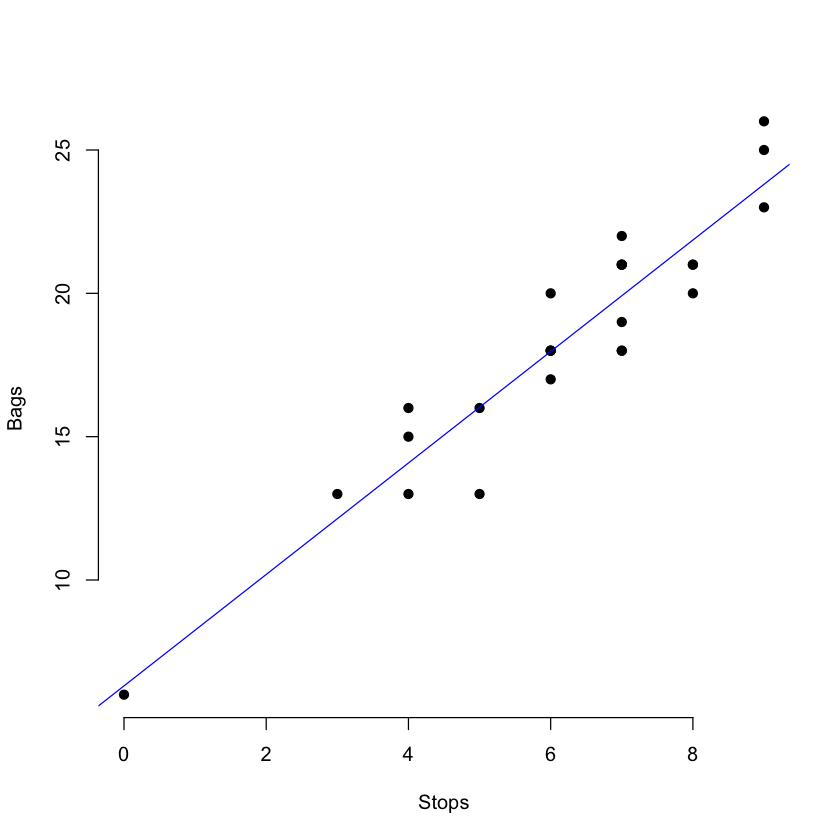

In [10]:
plot(x=data$Stops, y=data$Bags, xlab="Stops",ylab = "Bags",pch = 19,frame=FALSE)
abline(linearMod, col="blue")

The p-value is less 0.05, so there is a significant relationship between stops and bags. R-squared is high, so the stops are a strong predictor for the number of broken tea bags.

#### Residual Analysis

Residuals are performed to validate assumptions of the regression analysis. <br>
We have to check if the residuals are normally ditributed and <br>
Are there outliers?

What is a residual?
![](residual.png)

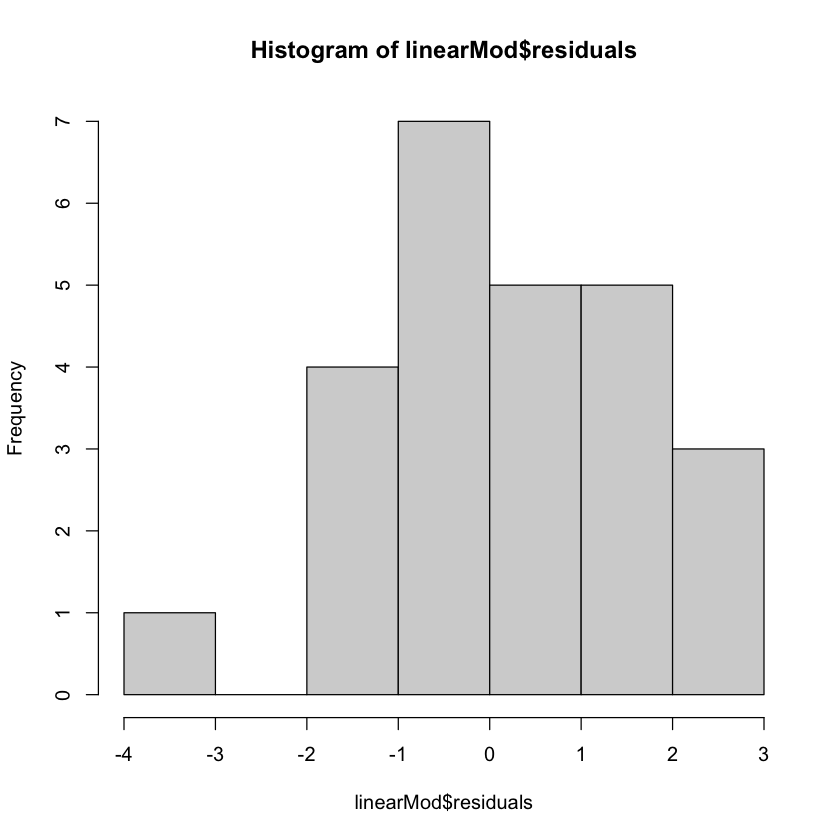

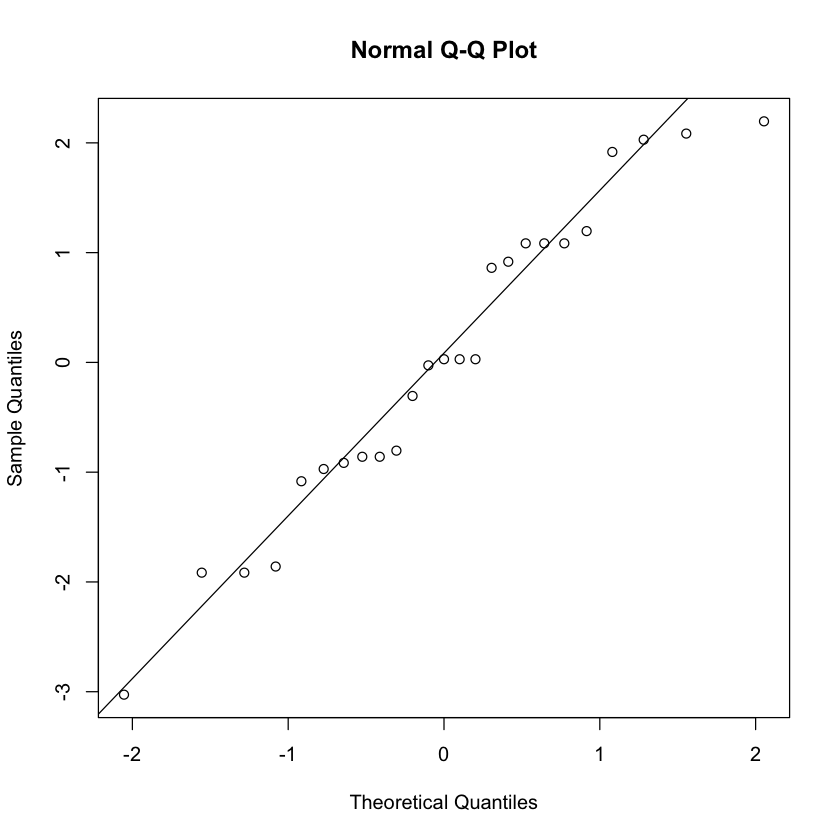

In [12]:
hist(linearMod$residuals)

qqnorm(linearMod$residuals)
qqline(linearMod$residuals)

Looks like the residuals are normal, which means we can trust the conclusions from our regression analysis as the assumptions are satisfied.

#### Prediction Interval

It is used to answer what is the maximum number of production stops if we want the number of broken tea bags to be under 15 on most of our days? (and statistically we will quantify this on most days as on 97.5% of the days)

# Quadratic Regression

Performed when your linear Regression Model doesn't fit well.<br>
Quadratic Model:<br>
$Y=a+bX+cX^2$

In [2]:
df<-read.csv("Caffeine-Table 1.csv",
               header = TRUE,
               sep = ",",
               stringsAsFactors = FALSE,
               skip = 6) [ ,1:2]

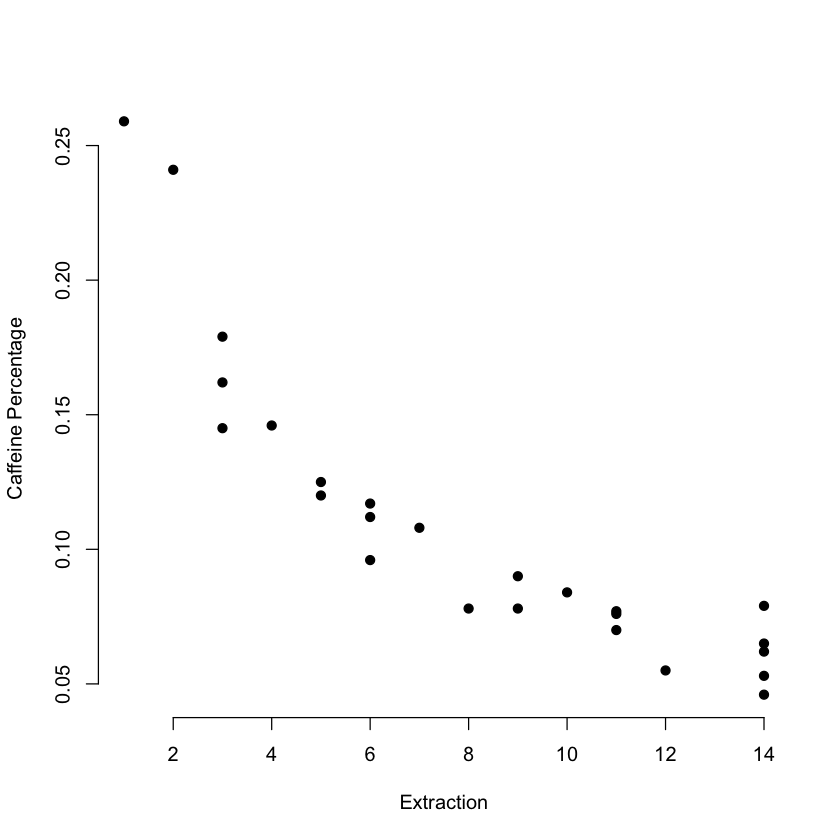

In [4]:
plot(x=df$Extr, y=df$Caf., xlab="Extraction",ylab = "Caffeine Percentage",pch = 19,frame=FALSE)

In [5]:
Extr2 <- df$Extr^2

In [7]:
quadraticMod <- lm(df$Caf. ~ df$Extr + Extr2, data=df)
summary(quadraticMod)


Call:
lm(formula = df$Caf. ~ df$Extr + Extr2, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034268 -0.008648 -0.001190  0.012810  0.034243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.2703389  0.0127789  21.155 4.11e-16 ***
df$Extr     -0.0346591  0.0036454  -9.508 3.00e-09 ***
Extr2        0.0014341  0.0002188   6.553 1.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01608 on 22 degrees of freedom
Multiple R-squared:  0.9216,	Adjusted R-squared:  0.9145 
F-statistic: 129.3 on 2 and 22 DF,  p-value: 6.883e-13


## Exercise Numerical Y and Numerical X (Picking)

CTQ: picking time (min)<br>
Influence factor: Number of items per order

you want to complete an order (25 items) before four o'clock, at what time should the employee start picking at the latest?

In [1]:
df<-read.csv("Picking-Table 1.csv",
               header = TRUE,
               sep = ",",
               stringsAsFactors = FALSE,
               skip = 7) [ ,1:3]

In [2]:
linearMod <- lm(df$Pick.time ~ df$Items ,data = df)

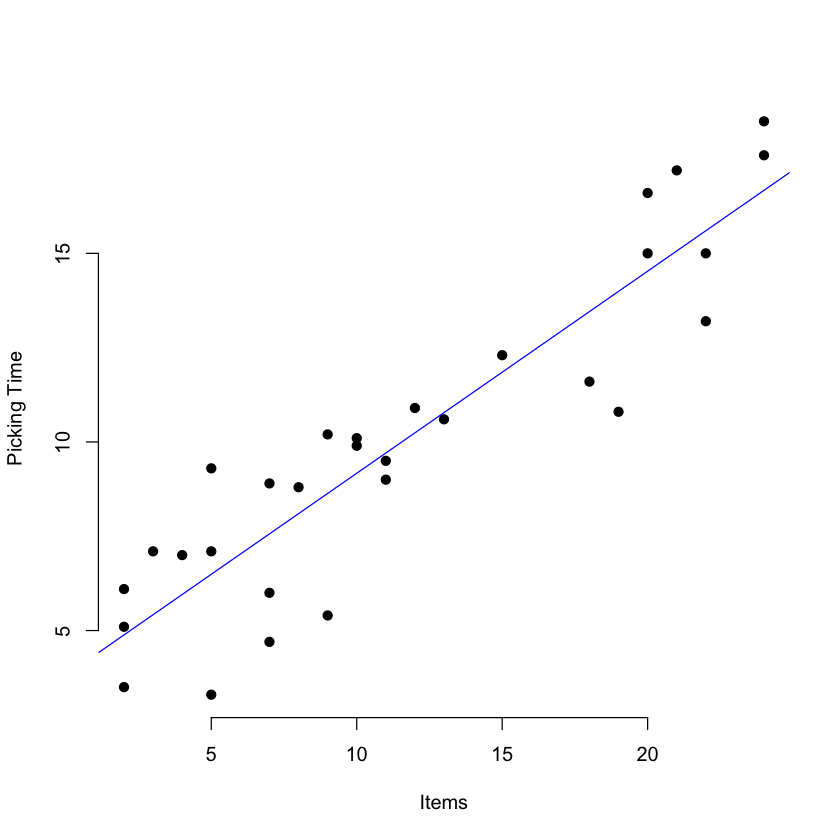

In [3]:
plot(x=df$Items, y=df$Pick.time, xlab="Items",ylab = "Picking Time",pch = 19,frame=FALSE)
abline(linearMod, col="blue")

In [4]:
summary(linearMod)


Call:
lm(formula = df$Pick.time ~ df$Items, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2347 -1.2145  0.5399  1.1732  2.8086 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81226    0.61839   6.165 1.18e-06 ***
df$Items     0.53583    0.04563  11.744 2.47e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.766 on 28 degrees of freedom
Multiple R-squared:  0.8312,	Adjusted R-squared:  0.8252 
F-statistic: 137.9 on 1 and 28 DF,  p-value: 2.473e-12


Relation between Items and Picking time is statisitcally significant as the pvalue is menor q 0.05. R-Sq is relatively high so the factor Number of items is a big Fish

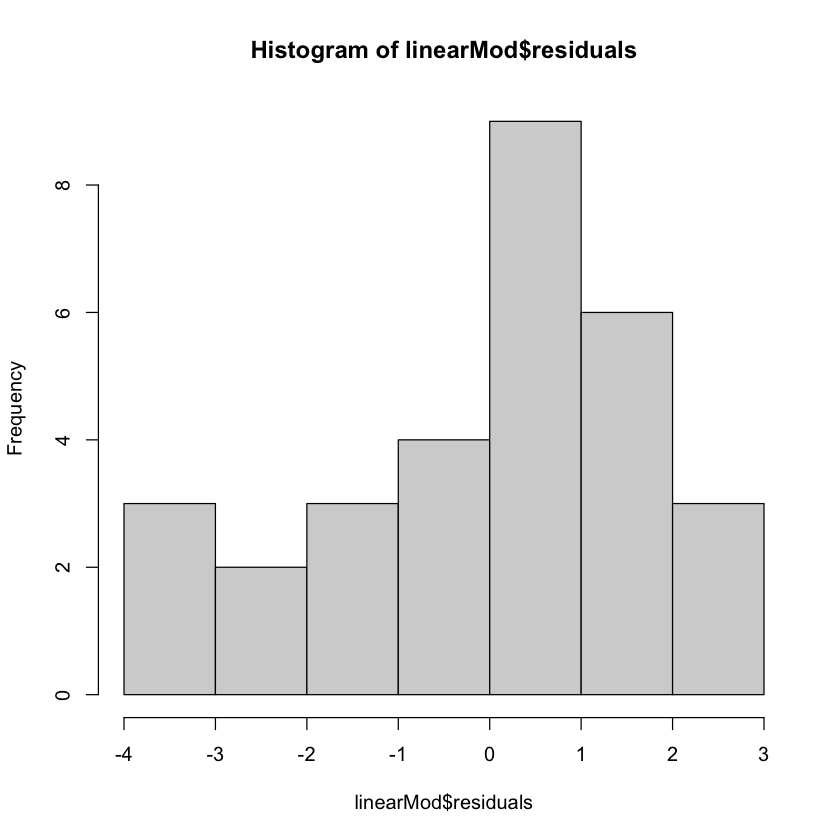

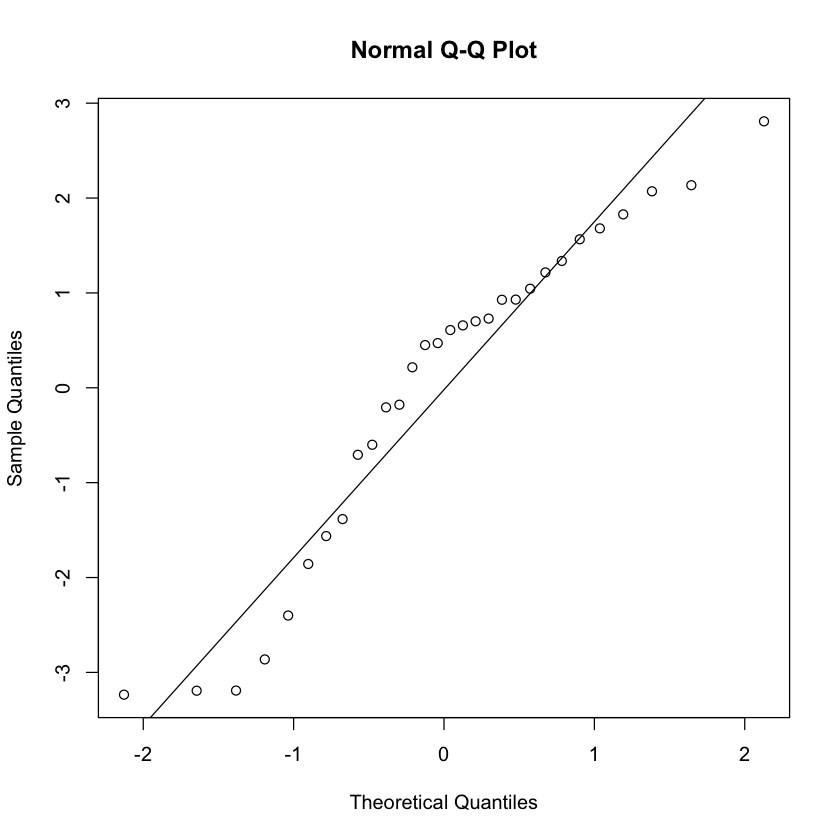

In [5]:
hist(linearMod$residuals)

qqnorm(linearMod$residuals)
qqline(linearMod$residuals)

In [7]:
Residual analysis assumptions remain validated

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected symbol
1: Residual analysis
             ^


In [8]:
newdata <- data.frame(df$Items<-25)
predict(linearMod, newdata, interval="predict")

Warning message:
“'newdata' had 1 row but variables found have 30 rows”


,fit,lwr,upr
1,17.20795,13.32322,21.09267
2,17.20795,13.32322,21.09267
3,17.20795,13.32322,21.09267
4,17.20795,13.32322,21.09267
5,17.20795,13.32322,21.09267
6,17.20795,13.32322,21.09267
7,17.20795,13.32322,21.09267
8,17.20795,13.32322,21.09267
9,17.20795,13.32322,21.09267
10,17.20795,13.32322,21.09267


To pick 25 items it will take aprox 17 min, but to be sure pick the upper bound of 21 min, the 97.5% of the cases

So 4pm minus 21 min is the item you have to start picking.